In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = r"C:\Users\72526\SuperStore_Orders.csv"

df = pd.read_csv(file_path, encoding="latin1")

shape = df.shape
head = df.head()
info = df.dtypes

shape, head, info

((51290, 21),
           order_id  order_date   ship_date       ship_mode    customer_name  \
 0     AG-2011-2040  01-01-2011  06-01-2011  Standard Class  Toby Braunhardt   
 1    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   
 2     HU-2011-1220  01-01-2011  05-01-2011    Second Class    Annie Thurman   
 3  IT-2011-3647632  01-01-2011  05-01-2011    Second Class     Eugene Moren   
 4    IN-2011-47883  01-01-2011  08-01-2011  Standard Class      Joseph Holt   
 
        segment            state    country  market   region  ...  \
 0     Consumer      Constantine    Algeria  Africa   Africa  ...   
 1     Consumer  New South Wales  Australia    APAC  Oceania  ...   
 2     Consumer         Budapest    Hungary    EMEA     EMEA  ...   
 3  Home Office        Stockholm     Sweden      EU    North  ...   
 4     Consumer  New South Wales  Australia    APAC  Oceania  ...   
 
           category sub_category                 product_name sales quantity  \
 0  Offi

In [ ]:
cols = list(df.columns)
for i, c in enumerate(cols, start=1):
    print(f"{i}. {c}")

cols


1. order_id
2. order_date
3. ship_date
4. ship_mode
5. customer_name
6. segment
7. state
8. country
9. market
10. region
11. product_id
12. category
13. sub_category
14. product_name
15. sales
16. quantity
17. discount
18. profit
19. shipping_cost
20. order_priority
21. year


['order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_name',
 'segment',
 'state',
 'country',
 'market',
 'region',
 'product_id',
 'category',
 'sub_category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit',
 'shipping_cost',
 'order_priority',
 'year']

In [50]:
# 1. Missing values per column
missing_values = df.isnull().sum()

# 2. Duplicate rows
duplicate_count = df.duplicated().sum()

# 3. Check if numeric columns are correctly typed
numeric_check = df[['sales', 'quantity', 'discount', 'profit', 'shipping_cost']].dtypes

# Try converting 'sales' to numeric (since it was read as object earlier)
df['sales_converted'] = pd.to_numeric(df['sales'], errors='coerce')
invalid_sales_count = df['sales_converted'].isnull().sum()

missing_values, duplicate_count, numeric_check, invalid_sales_count


(order_id          0
 order_date        0
 ship_date         0
 ship_mode         0
 customer_name     0
 segment           0
 state             0
 country           0
 market            0
 region            0
 product_id        0
 category          0
 sub_category      0
 product_name      0
 sales             0
 quantity          0
 discount          0
 profit            0
 shipping_cost     0
 order_priority    0
 year              0
 dtype: int64,
 np.int64(0),
 sales             object
 quantity           int64
 discount         float64
 profit           float64
 shipping_cost    float64
 dtype: object,
 np.int64(2630))

In [51]:
df['sales'] = df['sales'].replace(r'[^0-9.\-]', '', regex=True)

df['sales'] = pd.to_numeric(df['sales'], errors='coerce')


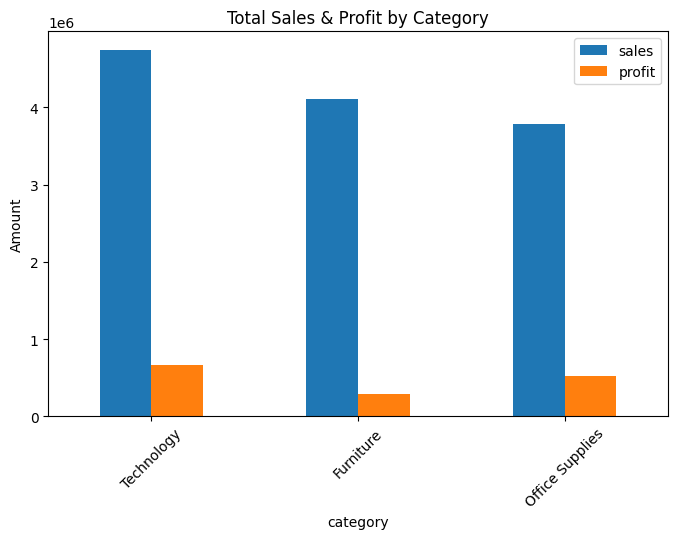

In [52]:
import matplotlib.pyplot as plt

category_summary = df.groupby("category")[["sales", "profit"]].sum().sort_values("sales", ascending=False)

category_summary.plot(kind="bar", figsize=(8,5))
plt.title("Total Sales & Profit by Category")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.show()


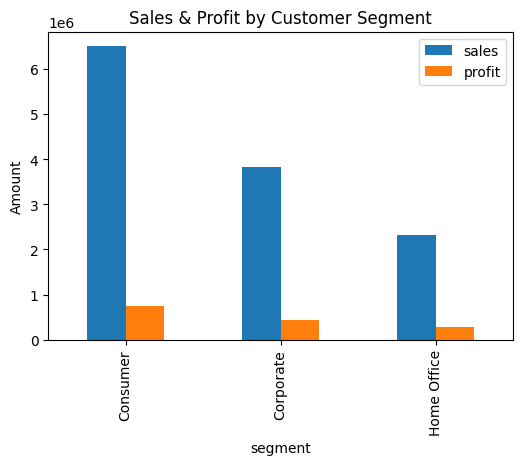

In [53]:
segment_summary = df.groupby("segment")[["sales", "profit"]].sum()

segment_summary.plot(kind="bar", figsize=(6,4))
plt.title("Sales & Profit by Customer Segment")
plt.ylabel("Amount")
plt.show()


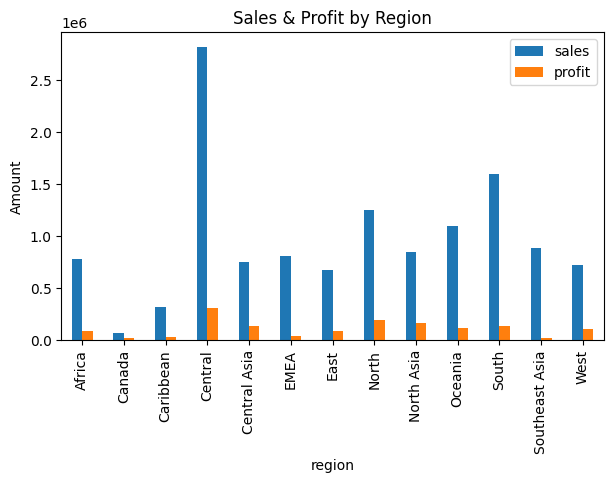

In [54]:
region_summary = df.groupby("region")[["sales", "profit"]].sum()

region_summary.plot(kind="bar", figsize=(7,4))
plt.title("Sales & Profit by Region")
plt.ylabel("Amount")
plt.show()


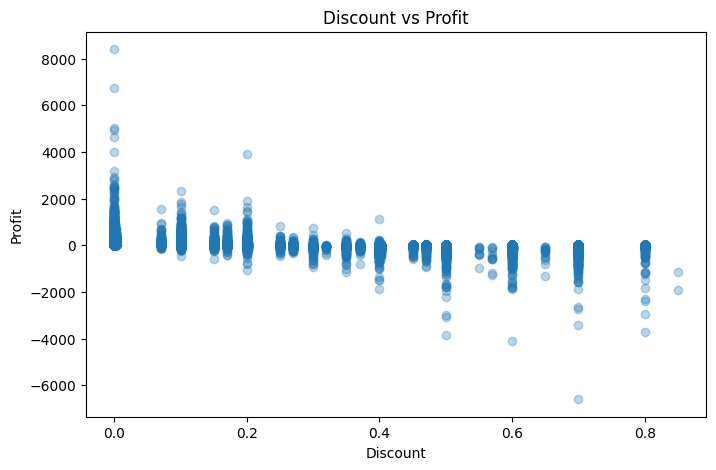

In [55]:
plt.figure(figsize=(8,5))
plt.scatter(df["discount"], df["profit"], alpha=0.3)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()


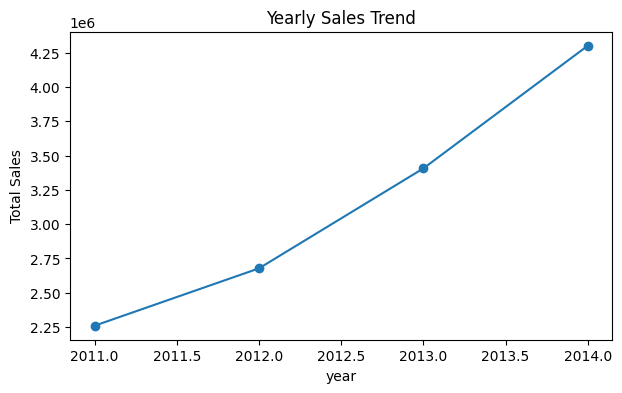

In [56]:
yearly_sales = df.groupby("year")["sales"].sum()

yearly_sales.plot(kind="line", marker="o", figsize=(7,4))
plt.title("Yearly Sales Trend")
plt.ylabel("Total Sales")
plt.show()


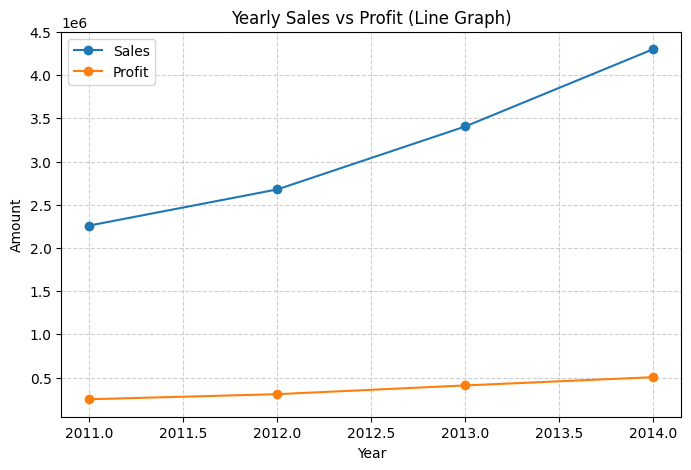

In [57]:
plt.figure(figsize=(8,5))
plt.plot(yearly_summary.index, yearly_summary["sales"], marker="o", label="Sales")
plt.plot(yearly_summary.index, yearly_summary["profit"], marker="o", label="Profit")

plt.title("Yearly Sales vs Profit (Line Graph)")
plt.xlabel("Year")
plt.ylabel("Amount")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


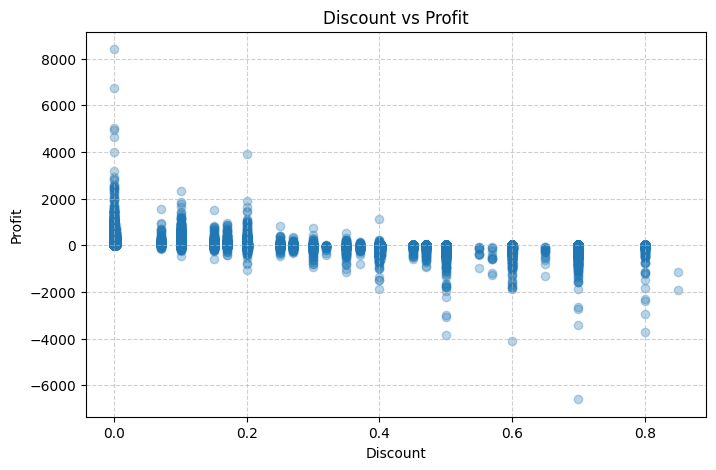

In [58]:
plt.figure(figsize=(8,5))
plt.scatter(df["discount"], df["profit"], alpha=0.3)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


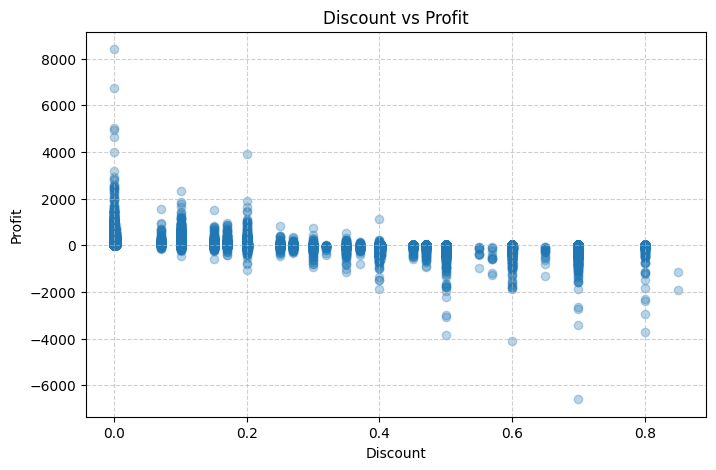

np.float64(-0.3163749562484045)

In [59]:
# Scatter plot: Discount vs Profit
plt.figure(figsize=(8,5))
plt.scatter(df["discount"], df["profit"], alpha=0.3)
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# Quick correlation check between discount and profit
corr_discount_profit = df["discount"].corr(df["profit"])
corr_discount_profit


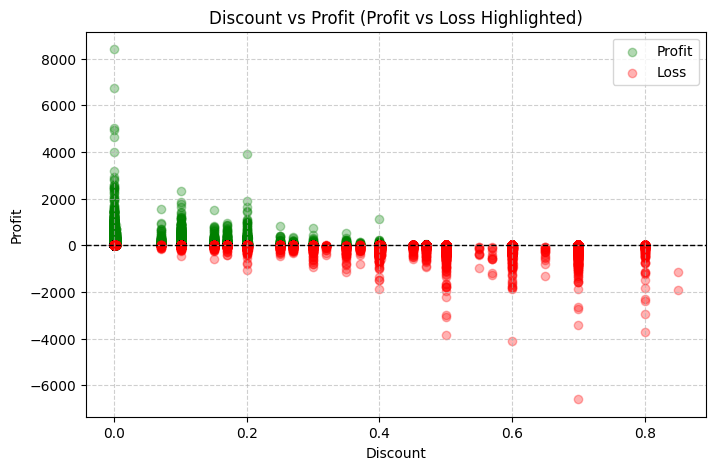

In [60]:
plt.figure(figsize=(8,5))

# Split the data into profitable and loss-making
profit_mask = df["profit"] > 0
loss_mask = df["profit"] <= 0

plt.scatter(df.loc[profit_mask, "discount"], df.loc[profit_mask, "profit"], 
            color="green", alpha=0.3, label="Profit")
plt.scatter(df.loc[loss_mask, "discount"], df.loc[loss_mask, "profit"], 
            color="red", alpha=0.3, label="Loss")

plt.axhline(0, color="black", linestyle="--", linewidth=1)  # horizontal line at profit=0
plt.title("Discount vs Profit (Profit vs Loss Highlighted)")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


C:\Users\72526\AppData\Local\Temp\ipykernel_20268\3959204171.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_agg = loss_df.groupby("discount_bin").agg(


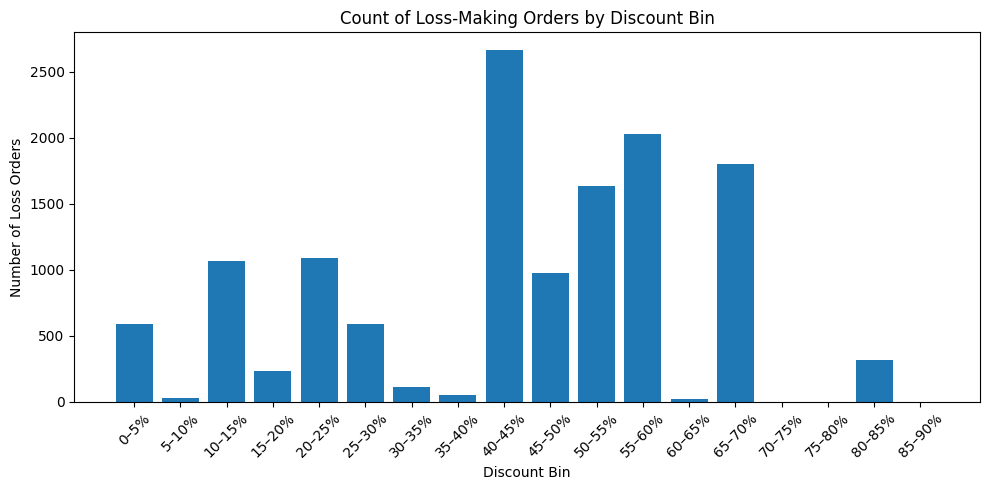

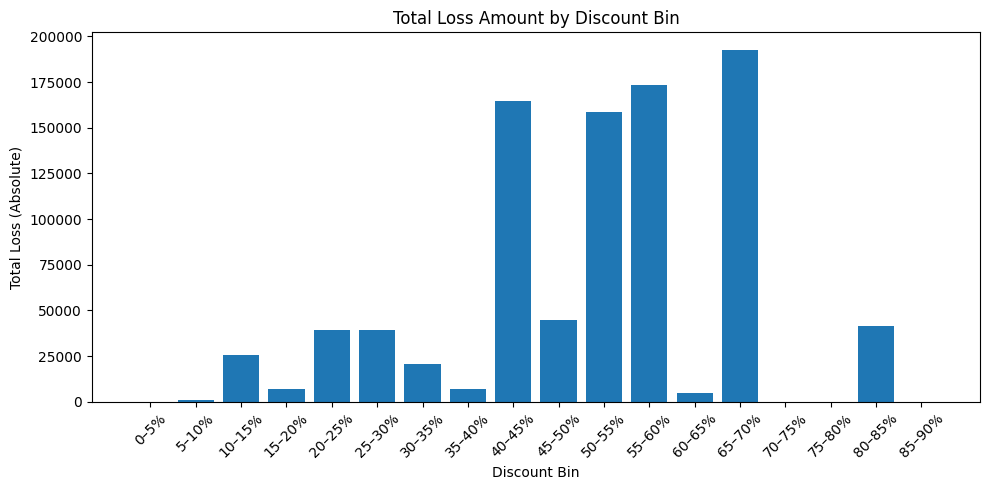

,loss_orders,total_loss
discount_bin,,
0–5%,592,18.50728
5–10%,30,1116.99900
10–15%,1069,25754.03340
15–20%,236,7033.95450
20–25%,1088,39262.92560
25–30%,589,39006.15700
30–35%,111,20438.02170
35–40%,51,6931.68450
40–45%,2667,164577.00448


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1) Filter loss-making orders
loss_df = df[df["profit"] <= 0].copy()
loss_df["loss_amount"] = -loss_df["profit"]  # make magnitude positive for visualization

# 2) Create discount bins (0%, 5%, 10%, ..., 90%)
bins = np.arange(0, 0.95, 0.05)  # [0.00, 0.05, 0.10, ..., 0.90]
labels = [f"{int(100*b)}–{int(100*(b+0.05))}%" for b in bins[:-1]]  # e.g., "0–5%", "5–10%", ...

# 3) Bin discounts and aggregate
loss_df["discount_bin"] = pd.cut(loss_df["discount"], bins=bins, right=False, labels=labels, include_lowest=True)
loss_agg = loss_df.groupby("discount_bin").agg(
    loss_orders=("order_id", "count"),
    total_loss=("loss_amount", "sum")
).reindex(labels)  # ensure full ordered index

# 4) Bar chart: number of loss-making orders per discount bin
plt.figure(figsize=(10,5))
plt.bar(loss_agg.index.astype(str), loss_agg["loss_orders"])
plt.title("Count of Loss-Making Orders by Discount Bin")
plt.xlabel("Discount Bin")
plt.ylabel("Number of Loss Orders")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 5) Bar chart: total loss magnitude per discount bin
plt.figure(figsize=(10,5))
plt.bar(loss_agg.index.astype(str), loss_agg["total_loss"])
plt.title("Total Loss Amount by Discount Bin")
plt.xlabel("Discount Bin")
plt.ylabel("Total Loss (Absolute)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

loss_agg.head(10)



C:\Users\72526\AppData\Local\Temp\ipykernel_20268\4278236916.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  discount_summary = df.groupby("discount_bin").agg(


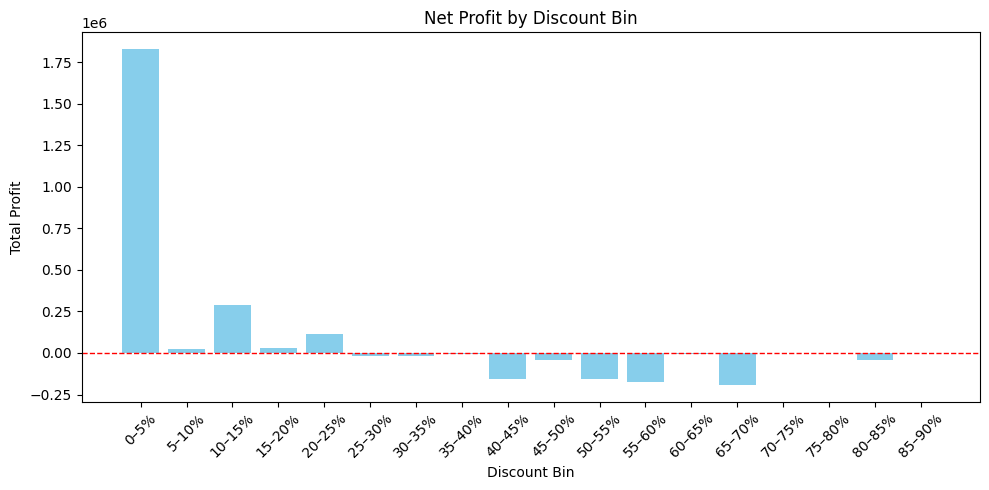

,total_sales,total_profit,orders
discount_bin,,,
0–5%,7254129,1.828672e+06,29470
5–10%,121620,2.114850e+04,150
10–15%,1885655,2.880176e+05,4609
15–20%,247404,2.816307e+04,735
20–25%,1220068,1.171206e+05,5039
25–30%,366327,-2.056034e+04,926
30–35%,110195,-1.656079e+04,149
35–40%,31615,-5.806202e+03,74
40–45%,593294,-1.551789e+05,3281


In [62]:
# Net profit by discount bin (profit - loss), across all orders, not just losses

# 1) Create discount bins for all orders
bins = np.arange(0, 0.95, 0.05)  # 0%, 5%, ..., 90%
labels = [f"{int(100*b)}–{int(100*(b+0.05))}%" for b in bins[:-1]]

df["discount_bin"] = pd.cut(df["discount"], bins=bins, right=False, labels=labels, include_lowest=True)

# 2) Aggregate total sales, profit, and order count per discount bin
discount_summary = df.groupby("discount_bin").agg(
    total_sales=("sales", "sum"),
    total_profit=("profit", "sum"),
    orders=("order_id", "count")
).reindex(labels)

# 3) Plot: Net profit per discount bin
plt.figure(figsize=(10,5))
plt.bar(discount_summary.index.astype(str), discount_summary["total_profit"], color="skyblue")
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Net Profit by Discount Bin")
plt.xlabel("Discount Bin")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

discount_summary.head(10)


C:\Users\72526\AppData\Local\Temp\ipykernel_20268\2977288500.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["category", "discount_bin"])


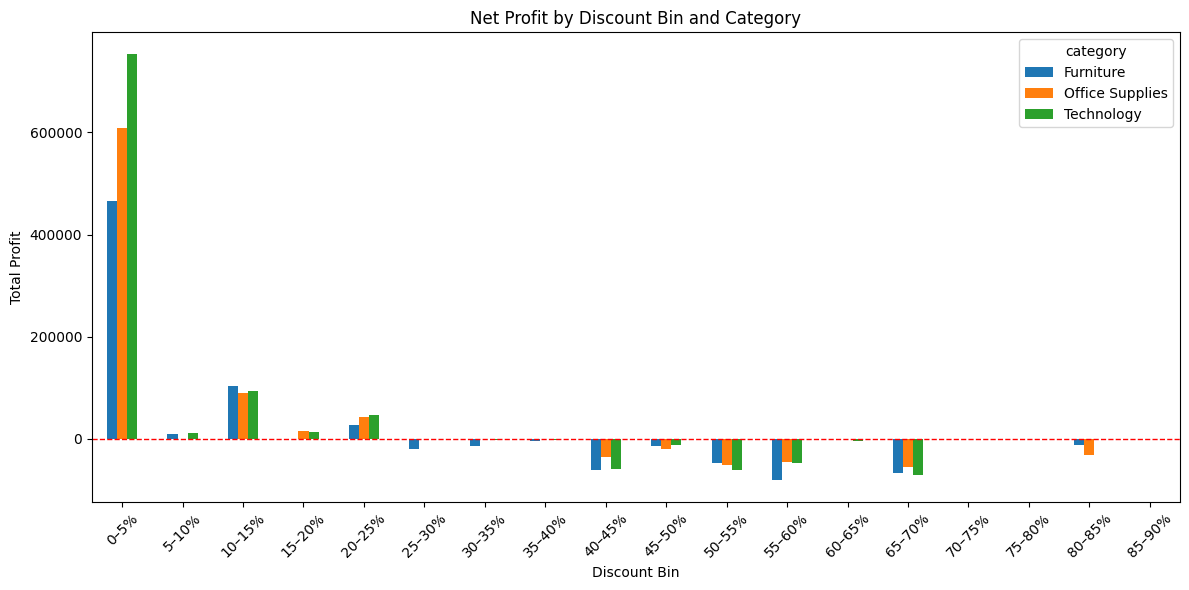

category,Furniture,Office Supplies,Technology
discount_bin,,,
0–5%,465612.9564,608725.2864,754333.61148
5–10%,9762.6864,0.0000,11385.81690
10–15%,104595.1884,89366.0503,94056.37180
15–20%,0.0000,15005.7396,13157.33430
20–25%,26574.1591,43135.4092,47411.02498
25–30%,-19459.6228,-596.5371,-504.18050
30–35%,-13629.0147,0.0000,-2931.77550
35–40%,-4031.3859,0.0000,-1774.81620
40–45%,-61464.3228,-35454.9160,-58259.66392


In [63]:
# Net profit by discount bin, broken down by product category

category_discount_summary = (
    df.groupby(["category", "discount_bin"])
      .agg(total_sales=("sales", "sum"),
           total_profit=("profit", "sum"),
           orders=("order_id", "count"))
      .reset_index()
)

# Pivot for visualization (profit per discount bin per category)
pivot_profit = category_discount_summary.pivot(index="discount_bin", columns="category", values="total_profit").reindex(labels)

# Plot: stacked bar of profit per discount bin per category
pivot_profit.plot(kind="bar", figsize=(12,6))
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Net Profit by Discount Bin and Category")
plt.xlabel("Discount Bin")
plt.ylabel("Total Profit")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

pivot_profit.head(10)


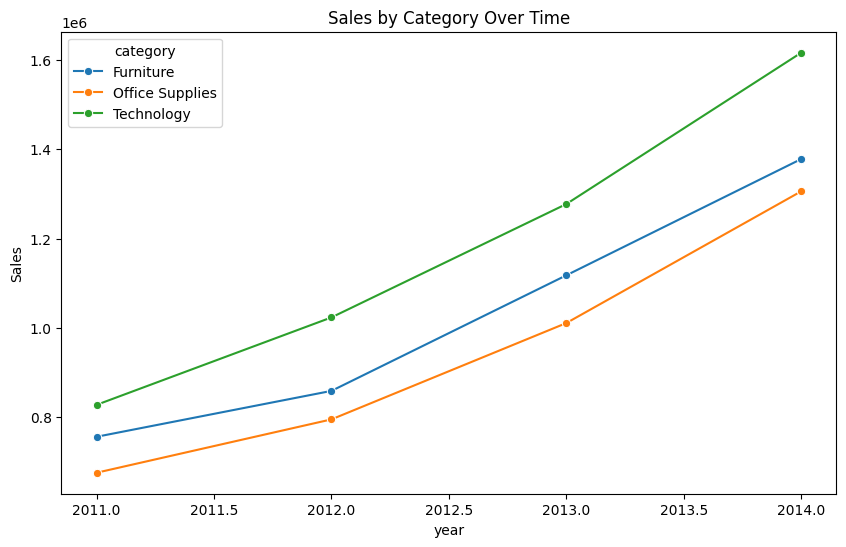

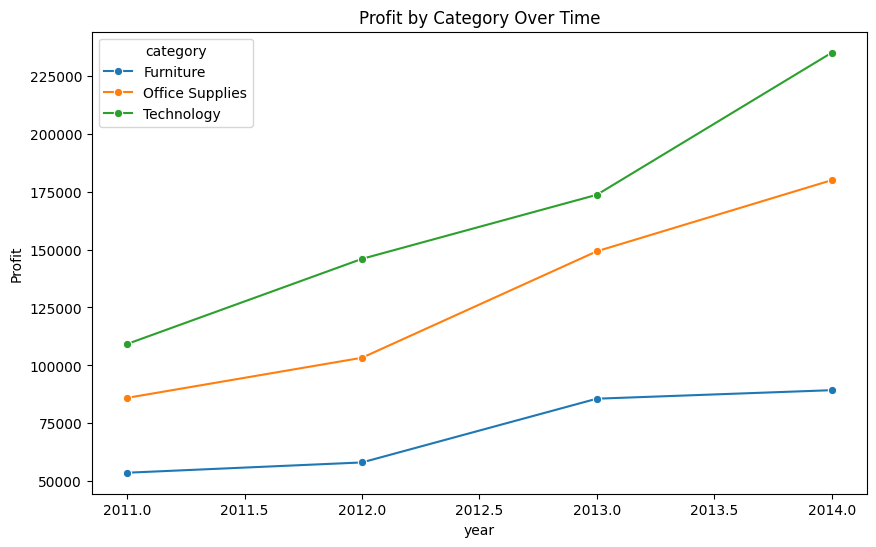

In [64]:
category_year_summary = (
    df.groupby(["year", "category"])
      .agg(total_sales=("sales", "sum"),
           total_profit=("profit", "sum"))
      .reset_index()
)
plt.figure(figsize=(10,6))
sns.lineplot(data=category_year_summary, x="year", y="total_sales", hue="category", marker="o")
plt.title("Sales by Category Over Time")
plt.ylabel("Sales")
plt.show()

plt.figure(figsize=(10,6))
sns.lineplot(data=category_year_summary, x="year", y="total_profit", hue="category", marker="o")
plt.title("Profit by Category Over Time")
plt.ylabel("Profit")
plt.show()


In [65]:
subcategory_summary = (
    df.groupby(["category", "sub_category"])
      .agg(total_sales=("sales", "sum"),
           total_profit=("profit", "sum"))
      .sort_values("total_profit")
)

subcategory_summary


total_sales  total_profit
category        sub_category                           
Furniture       Tables             757034  -64083.38870
Office Supplies Fasteners           83254   11525.42410
                Labels              73433   15010.51200
                Supplies           243090   22583.26310
                Envelopes          170926   29601.11630
Furniture       Furnishings        385609   46967.42550
Office Supplies Art                372163   57953.91090
Technology      Machines           779071   58867.87300
Office Supplies Paper              244307   59207.68270
                Binders            461952   72449.84600
                Storage           1127124  108461.48980
Technology      Accessories        749307  129626.30620
Office Supplies Appliances        1011081  141680.58940
Furniture       Chairs            1501682  141973.79750
                Bookcases         1466559  161924.41950
Technology      Phones            1706874  216717.00580
                Copiers           1509439  258567.54818

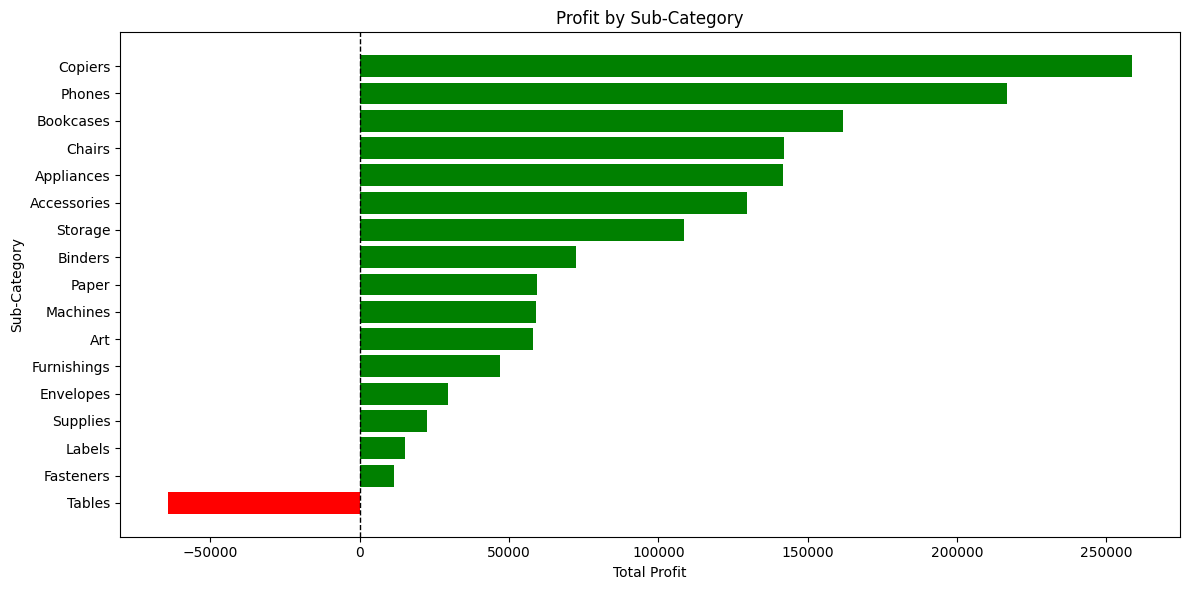

In [66]:
# Bar chart of subcategory profitability

plt.figure(figsize=(12,6))
subcategory_summary_sorted = subcategory_summary.sort_values("total_profit")

plt.barh(subcategory_summary_sorted.index.get_level_values("sub_category"), 
         subcategory_summary_sorted["total_profit"],
         color=["red" if x < 0 else "green" for x in subcategory_summary_sorted["total_profit"]])

plt.axvline(0, color="black", linestyle="--", linewidth=1)
plt.title("Profit by Sub-Category")
plt.xlabel("Total Profit")
plt.ylabel("Sub-Category")
plt.tight_layout()
plt.show()


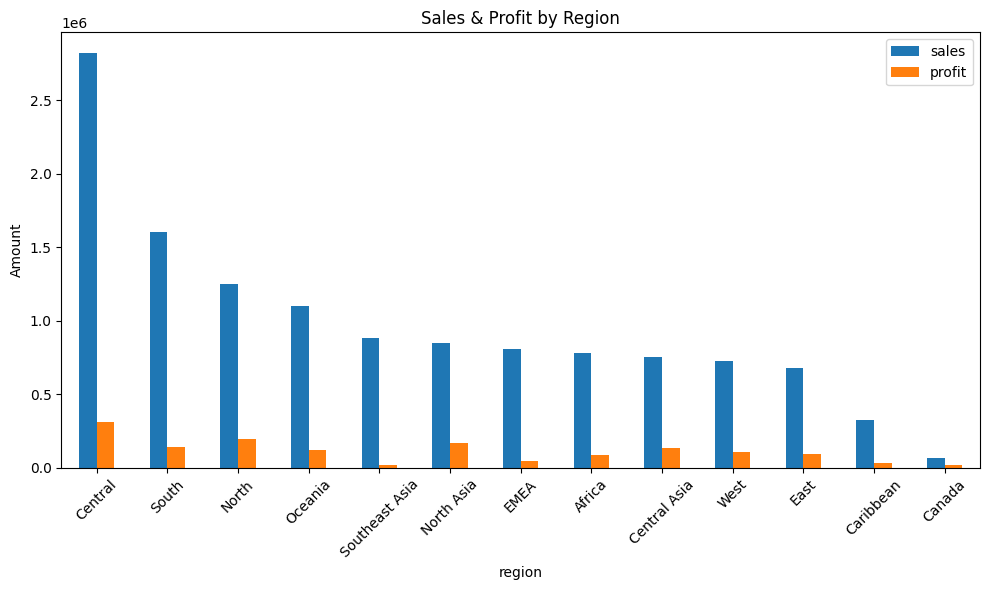

,sales,profit,profit_margin_%
region,,,
Central,2822399,311403.98164,11.033308
South,1600960,140355.76618,8.766975
North,1248192,194597.95252,15.590386
Oceania,1100207,121666.64200,11.058523
Southeast Asia,884438,17852.32900,2.018494
North Asia,848349,165578.42100,19.517725
EMEA,806184,43897.97100,5.445155
Africa,783776,88871.63100,11.338907
Central Asia,752839,132480.18700,17.597413


In [67]:
# Regional Sales vs Profit analysis

region_summary = (
    df.groupby("region")[["sales", "profit"]]
      .sum()
      .sort_values("sales", ascending=False)
)

# Plot: Sales vs Profit by Region
fig, ax = plt.subplots(figsize=(10,6))
region_summary.plot(kind="bar", ax=ax)
plt.title("Sales & Profit by Region")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calculate profit margin per region
region_summary["profit_margin_%"] = (region_summary["profit"] / region_summary["sales"]) * 100

region_summary


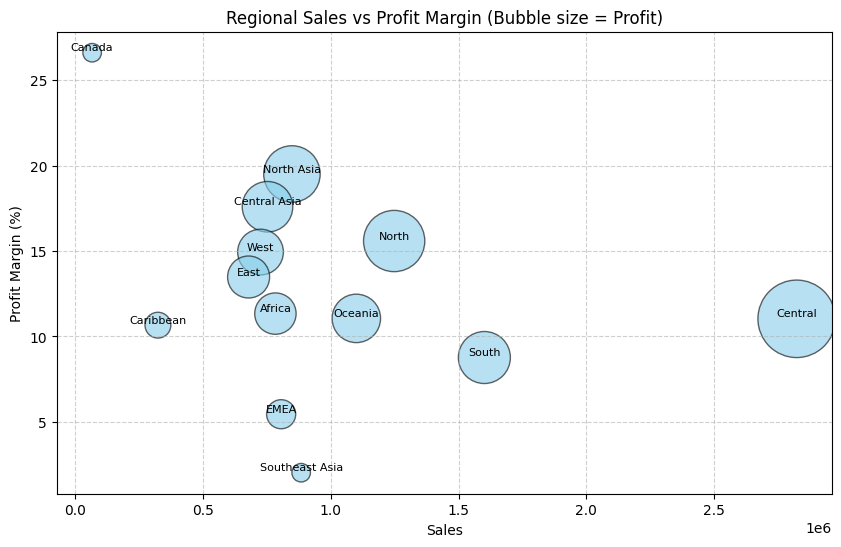

In [68]:
# Scatter plot: Sales vs Profit Margin, bubble size = Profit

plt.figure(figsize=(10,6))

plt.scatter(region_summary["sales"], region_summary["profit_margin_%"], 
            s=region_summary["profit"]/100, alpha=0.6, c="skyblue", edgecolor="black")

for region, row in region_summary.iterrows():
    plt.text(row["sales"], row["profit_margin_%"], region, fontsize=8, ha="center", va="bottom")

plt.title("Regional Sales vs Profit Margin (Bubble size = Profit)")
plt.xlabel("Sales")
plt.ylabel("Profit Margin (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


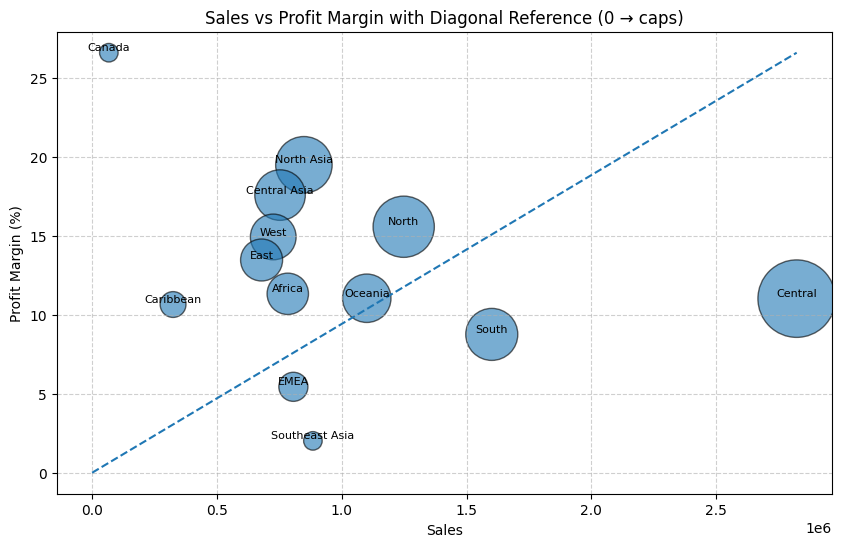

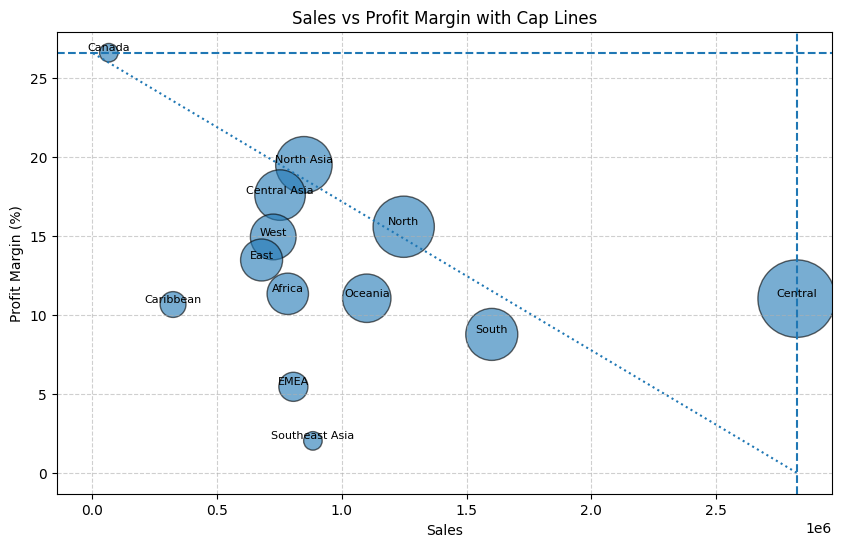

In [69]:
# Two reference-line visuals for Sales vs Profit Margin (regional view)

import numpy as np
import matplotlib.pyplot as plt

# Prepare data (region_summary already computed earlier)
sales = region_summary["sales"].values
margin = region_summary["profit_margin_%"].values
labels = region_summary.index.tolist()

max_sales = float(np.max(sales))
max_margin = float(np.max(margin))

# --- Plot A: Scatter with diagonal reference line from (0,0) to (max_sales, max_margin)
plt.figure(figsize=(10,6))
plt.scatter(sales, margin, s=region_summary["profit"]/100, alpha=0.6, edgecolor="black")

for x, y, name in zip(sales, margin, labels):
    plt.text(x, y, name, fontsize=8, ha="center", va="bottom")

# Diagonal reference line
plt.plot([0, max_sales], [0, max_margin], linestyle="--")

plt.title("Sales vs Profit Margin with Diagonal Reference (0 → caps)")
plt.xlabel("Sales")
plt.ylabel("Profit Margin (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# --- Plot B: Scatter with cap lines (horizontal at max margin, vertical at max sales)
plt.figure(figsize=(10,6))
plt.scatter(sales, margin, s=region_summary["profit"]/100, alpha=0.6, edgecolor="black")

for x, y, name in zip(sales, margin, labels):
    plt.text(x, y, name, fontsize=8, ha="center", va="bottom")

# Cap lines
plt.axhline(max_margin, linestyle="--")
plt.axvline(max_sales, linestyle="--")

# Optional: connection line from (max_sales, 0) to (0, max_margin)
plt.plot([max_sales, 0], [0, max_margin], linestyle=":")

plt.title("Sales vs Profit Margin with Cap Lines")
plt.xlabel("Sales")
plt.ylabel("Profit Margin (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


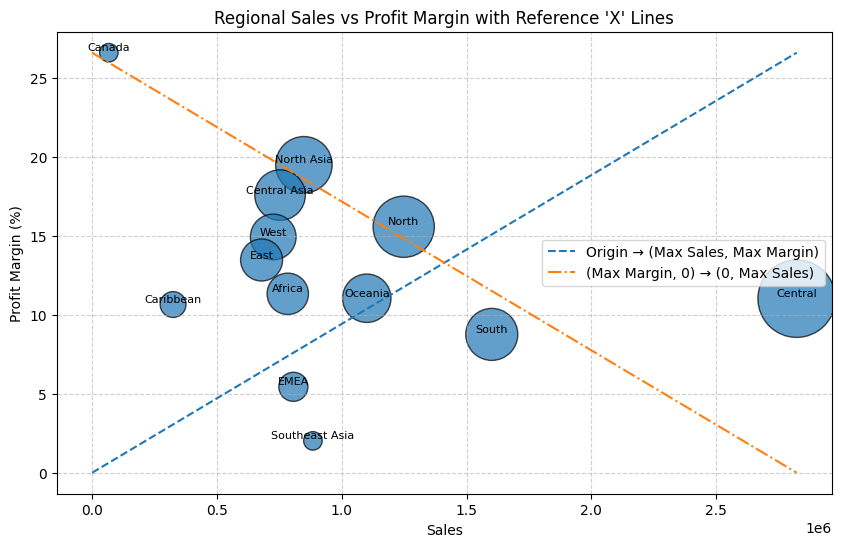

In [70]:
# Draw Sales vs Profit Margin scatter with two reference lines forming an "X":
#  - Line 1: from (0, 0) to (max_sales, max_margin)  -> "0 to top"
#  - Line 2: from (0, max_margin) to (max_sales, 0) -> opposite diagonal ("X" line)

import numpy as np
import matplotlib.pyplot as plt

sales = region_summary["sales"].values
margin = region_summary["profit_margin_%"].values
labels = region_summary.index.tolist()

max_sales = sales.max()
max_margin = margin.max()

plt.figure(figsize=(10,6))

# scatter (bubble size = profit for context)
sizes = (region_summary["profit"].values / 100).clip(min=10)  # min size for visibility
plt.scatter(sales, margin, s=sizes, alpha=0.7, edgecolor="black")

# annotations
for x, y, name in zip(sales, margin, labels):
    plt.text(x, y, name, fontsize=8, ha="center", va="bottom")

# reference lines
x_grid = np.linspace(0, max_sales, 200)
# Line 1: origin to (max_sales, max_margin)
y1 = (max_margin / max_sales) * x_grid
plt.plot(x_grid, y1, linestyle="--", linewidth=1.5, label="Origin → (Max Sales, Max Margin)")

# Line 2: (0, max_margin) to (max_sales, 0) (the 'X' line)
y2 = max_margin - (max_margin / max_sales) * x_grid
plt.plot(x_grid, y2, linestyle="-.", linewidth=1.5, label="(Max Margin, 0) → (0, Max Sales)")

plt.title("Regional Sales vs Profit Margin with Reference 'X' Lines")
plt.xlabel("Sales")
plt.ylabel("Profit Margin (%)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.show()
